In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

### Inspect dataset

In [5]:
diffusion_df = pd.read_parquet('parquets/diffusion_db.parquet')
hord_score_df = pd.read_parquet('parquets/hord_diffusiondb_scores.parquet')
train_split_df = pd.read_parquet('parquets/train_split.parquet')
validate_split_df = pd.read_parquet('parquets/validate_split.parquet')

In [6]:
print("Full hord data")
display(hord_score_df)
print("Train")
display(train_split_df)
print("Validate")
display(validate_split_df)

Full hord data


,id,ratings_count,rating,kudos,account_age,usage_requests,created_at,client_agent,artifacts,user_id,trusted,validated,captchas_failed,country
0,9e69b96c-d4f3-4619-a43b-1c09d4b4527a,5,5,-50,0,0,2023-01-15 01:50:49.074401,test,NaN,172c0ae94d2ce795d9fb0dfbbf3933ec75dab8c09c4866...,False,False,-1620,LU
1,021a696d-29cf-421c-95ff-bbede9a4a0f6,5,3,60,12791,5781,2023-01-12 18:17:02.502188,unknown:0:unknown,NaN,1e834a0fa5458eb59e15479883fea5d66b2d91a417b52d...,False,False,0,US
2,f0e6c314-d410-44b2-b9b5-9b9617d5c816,5,7,34,80478,1922,2023-01-12 18:17:02.961531,unknown:0:unknown,NaN,db7b4be6fa51d8d38316c129369b912e9b5d7149e0bb07...,False,False,-5,DK
3,dfe20f20-d124-48bb-81af-72c95da5174b,5,9,91,83798,28,2023-01-12 18:17:10.046797,unknown:0:unknown,NaN,484c71fc58625a9417c5224626de9da66dc36b6f625767...,False,False,0,CH
4,8c3a28d3-6f53-47bb-b060-8b2fc0ce54eb,5,6,70,12811,5781,2023-01-12 18:17:24.286820,unknown:0:unknown,NaN,1e834a0fa5458eb59e15479883fea5d66b2d91a417b52d...,False,False,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198110,383d8b9b-0b9a-4999-8750-c90744a1086e,3,2,-50,0,0,2023-11-25 22:26:57.175737,ArtBot:v.1:(discord)rockbandit#4910,4.0,172c0ae94d2ce795d9fb0dfbbf3933ec75dab8c09c4866...,False,False,-1620,US
2198111,0942872b-ed8f-40b0-9bc8-af283b15fc6a,3,6,285,25527511,0,2023-11-25 22:30:17.282266,ArtBot:v.1:(discord)rockbandit#4910,3.0,6f1eec2fc5644a8c675069d72610d114295b1f01c38d24...,False,False,1,RS
2198112,e54dfdb7-955a-482c-8448-eb1acae66308,3,1,2508,19463,0,2023-11-25 22:30:33.422977,ArtBot:v.1:(discord)rockbandit#4910,NaN,8cb52821fa2a57c9175a9e8686d823a9c25c1a21a74476...,False,False,-52,FI
2198113,1555ee11-5800-48ba-ac4f-92e4a62c89e4,3,6,16737,4266145,0,2023-11-25 22:31:10.760242,ArtBot:v.1:(discord)rockbandit#4910,2.0,303a391144ef9fb0cd77d5a7ef404a18363fa61d802d04...,False,False,-420,FR


Train


,image_name,ratings_count,rating,artifacts,prompt,part_id,width,height
317683,b82f9fb1-087c-4479-804c-220bbe16f2b9.webp,5,4.0,3.0,"Jeri Ryan Seven of Nine, as a borg (a cybernet...",13986,512,512
141502,50c24850-2164-452e-a40d-508ba3d1275d.webp,3,6.0,4.0,[ squidward ] wearing fire nation clothing and...,415,512,640
347529,c9a30075-34d7-4fd8-8cbf-6ec672b3caa3.webp,5,6.0,2.0,"small centered on watercolor paper, paint brus...",314,768,512
277563,a08fff18-70e9-470b-a76a-de7d3ea4298d.webp,6,5.0,2.0,film still of kylie jenner as a gothic vampire...,198,512,704
150211,55e33435-37a8-46c6-810d-a97d360cb9a8.webp,5,6.0,3.0,disney princess friends by gil elvgren and oli...,55,512,512
...,...,...,...,...,...,...,...,...
398394,e775fd2c-d8df-45b8-8692-4ba3e472c00f.webp,5,5.0,4.0,"a intricately detailed portrait of an old man,...",115,768,768
44319,18e397e4-887a-4c56-9599-43d0288e590b.webp,5,4.0,5.0,wide angle full body portrait shot of a ninja ...,284,512,704
215755,7c4a4496-df9d-415d-9433-bc5ff36f3c1d.webp,5,4.0,4.0,astronaut cyberpunk surreal upside down city n...,13977,512,768
159820,5b71fbb3-7ca6-4cbd-b7ae-8746a07cd27f.webp,5,4.0,3.0,"looped circle of pipe sharp focus, highly deta...",413,1024,576


Validate


,image_name,ratings_count,rating,artifacts,prompt,part_id,width,height
53431,1def12c3-a91b-431b-a14a-aa19f4995840.webp,4,6.0,3.0,upper body portrait of actor kenneth mcmillan ...,13976,512,768
240706,8ae4dc87-c293-45be-8668-bedac4cad9fd.webp,5,8.0,2.0,portrait of a 🇹🇷 👩 by wlop,307,512,512
230145,84b76dde-dd9a-43e8-8975-79b74b46b4c5.webp,5,4.0,3.0,portrait of a cinematic still of shigeru miyam...,147,512,640
88682,32122fca-457e-4b0a-9c5a-eeb92d001b17.webp,5,4.0,4.0,Digital color pen drawing of Clint Eastwood fr...,13995,512,640
55996,1f5a7c00-3593-4b35-8761-9439839b439e.webp,4,7.0,1.0,"A 17th Century beggar, with the letter B carve...",13958,512,512
...,...,...,...,...,...,...,...,...
260005,9643c01c-6e56-4dee-b2cc-ca65e6150ab6.webp,5,7.0,2.0,"large flower face, girl standing in a flower f...",141,512,512
366901,d51376e9-0201-4646-afe4-07d46d4bb97e.webp,5,5.0,3.0,a neon robotic cyberpunk steamboat in bay of t...,299,704,512
132512,4b72c113-95c4-4b54-ac49-0cdcb6e98e05.webp,5,5.0,3.0,[ bubble bass ] from the show'spongebob square...,418,512,512
147476,54471e19-ac29-4177-aa0b-eacd0239e720.webp,4,4.0,3.0,ornithopter,130,512,512


In [7]:
# Unique images with different counts:
hord_score_df.groupby("id").agg({"ratings_count": "count"})["ratings_count"].value_counts().sort_index()
        

1     12676
2     11839
3     12315
4     39580
5    363475
6     23692
7       967
8        25
Name: ratings_count, dtype: int64

Hord score field description
* id refers to the image ID, which should match the filename in the diffusiondb dataset (https://poloclub.github.io/diffusiondb/).
* ratings_count column is how many ratings for the same ID you will find in the same parquet. 
* rating is the aesthetic rating going from 1-10. It is a subjective rating for the user in isolation from the prompt or comparison with other images. 
* kudos is how much kudos the user had when they rated the image. A lot of kudos means they did a lot of image generations with their own worker (or were otherwise a nice egg and got gifted). Negative kudos means they're been generating * * images for themselves a lot. Both good indicators of an active user.
* usage_requests is how many images they requested to generate. More means more active. Again, good indicator it's not a malicious rating (I don't think we have any but you never know)
* artifact is the artifacts rating of the image going from 0 to 5, where 0 is a flawless image with no a

### Clean hord data

In [8]:
import random
cleaned_hord_df = hord_score_df.groupby("id").agg({"ratings_count": "count", "rating": "median", "artifacts": "median"}).reset_index()
cleaned_hord_df["rating"] = cleaned_hord_df["rating"].apply(lambda x: x if x.is_integer() else round(random.choice([0.1, -0.1]) + x, 0))
display(cleaned_hord_df.sample(20))

,id,ratings_count,rating,artifacts
392977,d7805a55-3f68-4aa6-a573-844bedffafd5,5,10.0,1.0
139367,4832da4c-294f-4666-add0-011b26cb9317,5,4.0,2.5
186357,628c87a5-3dd1-4d8e-8732-40d0df387c0c,5,7.0,3.0
396735,d9937d3a-7918-4d82-924a-5bf4a88d5599,5,7.0,1.0
138284,479c7391-a82d-4752-9442-30ff0f48989a,3,6.0,1.0
354027,c19552c1-eeea-4a10-b23e-1e2983a03bb0,4,9.0,1.0
435631,ef9abb1b-1c50-4c84-8b12-f5e0e8509909,5,5.0,4.0
261474,8d1de6a6-7fbc-4453-bd5d-a4d0e58df2d8,5,10.0,2.0
193150,6676aa21-5c9b-484b-8e2b-f7ae8c67ecfb,5,6.0,4.0
87260,2ceae568-c7a6-49d7-a31a-df19117e0b43,5,6.0,4.0


In [9]:
diffusion_df = diffusion_df.assign(hord_id=diffusion_df['image_name'].str.split(".", expand=True)[0])
scored_diffusion_df = pd.merge(left=cleaned_hord_df, right=diffusion_df, left_on='id', right_on='hord_id')
scored_diffusion_df['image_path'] = "dataset/" + scored_diffusion_df['image_name']
display(scored_diffusion_df.shape[0])
display(scored_diffusion_df.sample(5))

464569

,id,ratings_count,rating,artifacts,image_name,prompt,part_id,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw,hord_id,image_path
439813,f1f7d6bc-f1ad-45fd-aacb-ac214964ed78,6,5.0,3.0,f1f7d6bc-f1ad-45fd-aacb-ac214964ed78.webp,original by _ beeple _ aaron _ horkey _ amanda...,370,887931943,50,3.0,8,384,512,defdfc180bef60ff8746eaf80500f7a4c4276832233042...,2022-08-15 13:29:00+00:00,0.093786,0.000357,f1f7d6bc-f1ad-45fd-aacb-ac214964ed78,dataset/f1f7d6bc-f1ad-45fd-aacb-ac214964ed78.webp
72183,25165910-fd8f-48e3-a8e2-43de25c45e26,2,4.0,0.0,25165910-fd8f-48e3-a8e2-43de25c45e26.webp,digital painting of a cartoonish rat wearing r...,105,871207317,150,14.6,8,512,640,da43d02270b2c65d67ba447dfe5ca12a377a476335ae81...,2022-08-13 19:30:00+00:00,0.253395,0.064328,25165910-fd8f-48e3-a8e2-43de25c45e26,dataset/25165910-fd8f-48e3-a8e2-43de25c45e26.webp
408134,dffa0857-6576-4594-a1b8-e032ad4a4f08,5,6.0,5.0,dffa0857-6576-4594-a1b8-e032ad4a4f08.webp,dirty bottle of milk and a cow inside slaughte...,377,103117273,50,7.0,8,512,512,91709ce74882abfa8ac5e67d47035210389f3790563574...,2022-08-15 11:26:00+00:00,0.087734,0.088515,dffa0857-6576-4594-a1b8-e032ad4a4f08,dataset/dffa0857-6576-4594-a1b8-e032ad4a4f08.webp
459354,fd16445c-7810-4bfa-8f8f-0b6d81d175a5,6,5.0,1.5,fd16445c-7810-4bfa-8f8f-0b6d81d175a5.webp,"a silver cat sprouting new silver cats, l - sy...",420,2500630541,50,15.0,8,1024,512,7ff8163a2d30f01356be298510fc67bcf3ff82c20ac223...,2022-08-14 14:37:00+00:00,0.036478,0.000581,fd16445c-7810-4bfa-8f8f-0b6d81d175a5,dataset/fd16445c-7810-4bfa-8f8f-0b6d81d175a5.webp
405731,de91a50c-6a72-412d-b431-6f0b4002d001,5,3.0,4.0,de91a50c-6a72-412d-b431-6f0b4002d001.webp,herve is a 2 9 year old french - canadian ice ...,38,1809141045,50,7.0,8,512,1280,f76942e6a8a6b9a4468008a6b22f86e339ef0bb06f5006...,2022-08-16 18:40:00+00:00,0.084016,0.035288,de91a50c-6a72-412d-b431-6f0b4002d001,dataset/de91a50c-6a72-412d-b431-6f0b4002d001.webp


In [10]:
#Inspect some ID
display(hord_score_df[hord_score_df["id"] == "a670a7a2-aebb-40a1-a1b8-89d7d2437c56"])


#tmp.groupby(["id", "country"]).apply(display)

#print(tmp.groupby(["id", "country"]).filter(lambda x: x["ratings_count"].count() > 5).groupby(["id", "country"])["account_age"].describe().to_markdown(tablefmt="simple_outline"))
#print(tmp.groupby(["id", "country"]).filter(lambda x: x["ratings_count"].count() > 5).groupby(["id", "country"]).apply(display).to_markdown(tablefmt="outline"))
#tmp.groupby(["id", "country"]).apply(display)


#tmp = (hord_score_df.groupby(["id", "country"])["ratings_count"].count() > 5).reset_index()
#tmp[tmp["ratings_count"]].groupby(["id", "country"]).count()

#hord_score_df[hord_score_df["ratings_count"] > 5].groupby(["id", "country"]).count()

,id,ratings_count,rating,kudos,account_age,usage_requests,created_at,client_agent,artifacts,user_id,trusted,validated,captchas_failed,country
74715,a670a7a2-aebb-40a1-a1b8-89d7d2437c56,5,10,1640,8496,252,2023-03-06 23:48:29.459943,ArtBot:v.1:(discord)rockbandit#4910,1.0,68a71ea8e106a5ddd1871fb73e0175ca83276732e6a52e...,False,False,-13,US
85121,a670a7a2-aebb-40a1-a1b8-89d7d2437c56,5,10,130,80935,0,2023-03-07 10:44:13.034780,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8...,False,False,0,GB
664709,a670a7a2-aebb-40a1-a1b8-89d7d2437c56,5,10,24,438,534,2023-02-15 14:34:05.697943,StableUI:1.0:(discord)aqualxx#5004,0.0,f7ed47046cfab6eca4781b4beb3b00130796ab48adad5e...,False,False,-6819,US
676650,a670a7a2-aebb-40a1-a1b8-89d7d2437c56,5,7,151,181094,0,2023-04-24 02:36:52.767873,ArtBot:v.1:(discord)rockbandit#4910,2.0,ba411e3603f8a86413c7d66ba8e666e3c8086558a5d1f5...,False,False,-270,US
678186,a670a7a2-aebb-40a1-a1b8-89d7d2437c56,5,6,313,1318,0,2023-04-24 05:24:51.807382,StableUI:1.1:(discord)aqualxx#5004,3.0,7baab72bb3dd2c44c0d6db5cb9f3e96db5d05cf6dfdd60...,False,False,-75,CH


### Filter dataset

In [11]:
MINIMUM_RATING_COUNT = 3
unique_df = scored_diffusion_df[scored_diffusion_df["ratings_count"] >= MINIMUM_RATING_COUNT]
unique_df = unique_df[["image_name", "rating", "artifacts", "prompt", "part_id", "image_path"]]
unique_df

,image_name,rating,artifacts,prompt,part_id,image_path
0,00005ed5-61db-464d-b42c-d27da1487049.webp,4.0,2.0,a portrait of a interstellar hitchhiker john m...,375,dataset/00005ed5-61db-464d-b42c-d27da1487049.webp
1,0000655f-76cf-4923-bd20-22ce89755990.webp,5.0,1.5,"young natalie portman, legendary warrior, hero...",136,dataset/0000655f-76cf-4923-bd20-22ce89755990.webp
3,0000b753-c30e-46bf-a85f-993359dc003b.webp,4.0,3.0,"full body pose, beautiful adult library fairy,...",419,dataset/0000b753-c30e-46bf-a85f-993359dc003b.webp
4,000104cf-dfa7-49bd-acb8-13a3d6b61fcc.webp,9.0,3.0,a luxury house of brutalist architecture surro...,312,dataset/000104cf-dfa7-49bd-acb8-13a3d6b61fcc.webp
5,00018610-20bb-42c8-b254-179004cfbd66.webp,6.0,0.0,"labyrinth half filled with water, dynamic, sca...",327,dataset/00018610-20bb-42c8-b254-179004cfbd66.webp
...,...,...,...,...,...,...
464564,ffff6627-f18d-4bdf-9d25-bcf407f6a924.webp,3.0,4.0,"unaware, i'm tearing you asunder ( ye - yeah, ...",402,dataset/ffff6627-f18d-4bdf-9d25-bcf407f6a924.webp
464565,ffff97c3-708e-4a3a-b05b-9a4f87da9e81.webp,9.0,1.5,"cosmic lovecraft random marvel hero portrait, ...",74,dataset/ffff97c3-708e-4a3a-b05b-9a4f87da9e81.webp
464566,ffffbdce-1643-476a-8c5b-a5356c9541ed.webp,5.0,2.0,“A fantastic ink painting of a very well-built...,197,dataset/ffffbdce-1643-476a-8c5b-a5356c9541ed.webp
464567,ffffd176-7b21-49d9-9007-e4b1b65f6f88.webp,5.0,4.0,"green-haired woman with six arms, animal horns...",13938,dataset/ffffd176-7b21-49d9-9007-e4b1b65f6f88.webp


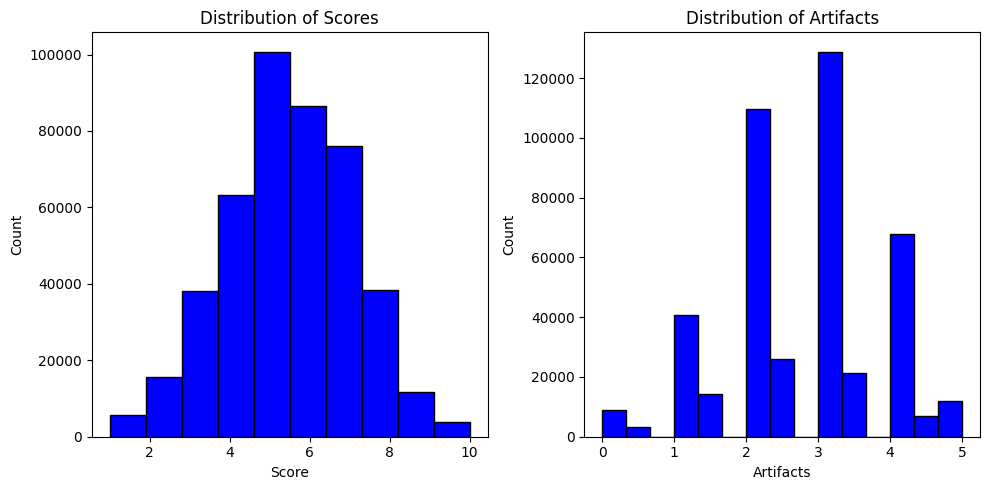

In [12]:
def plot(plot_df):
    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    # Plot the first histogram on the first subplot
    ax1.hist(plot_df["rating"], bins=10, density=False, color='blue', edgecolor='black')
    ax1.set_xlabel('Score')
    ax1.set_ylabel('Count')
    ax1.set_title('Distribution of Scores')

    # Plot the second histogram on the second subplot
    ax2.hist(plot_df["artifacts"], bins=15, density=False, color='blue', edgecolor='black')
    ax2.set_xlabel('Artifacts')
    ax2.set_ylabel('Count')
    ax2.set_title('Distribution of Artifacts')

    # Adjust the layout of the subplots
    fig.tight_layout()

    # Show the figure
    plt.show()

plot(unique_df)
#plot(validate_split_df)

### Show images

In [13]:
from io import BytesIO
from PIL import Image
import base64
from IPython.display import HTML

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((250, 250), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()
    
def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

pd.set_option('display.max_colwidth', -1)

C:\Users\kenbo\AppData\Local\Temp\ipykernel_67532\1935137546.py:21: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [15]:
import ipyplot

images = unique_df[unique_df["rating"].between(9,10.1)]["image_path"].values
ipyplot.plot_images(images, img_width=250, max_images=300)
#ipyplot.plot_class_tabs(images, "rating", max_imgs_per_tab=10, img_width=150)
display(f"total: {len(images)}")
display(images)

'total: 15625'

array(['dataset/000104cf-dfa7-49bd-acb8-13a3d6b61fcc.webp',
       'dataset/0004e286-6f9e-4f0b-a2ea-10f904d3888f.webp',
       'dataset/00073e57-f185-4621-8425-31a0eaec0161.webp', ...,
       'dataset/fff99dd2-9de4-41ba-baca-c436810b29a7.webp',
       'dataset/fffb3f4f-1cea-4c6c-b439-6a3e5f917c16.webp',
       'dataset/ffff97c3-708e-4a3a-b05b-9a4f87da9e81.webp'], dtype=object)

In [14]:
pd.set_option('display.max_colwidth', -1)
display(hord_score_df[hord_score_df["id"] == "a670a7a2-aebb-40a1-a1b8-89d7d2437c56"])

C:\Users\kenbo\AppData\Local\Temp\ipykernel_23964\791945145.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,id,ratings_count,rating,kudos,account_age,usage_requests,created_at,client_agent,artifacts,user_id,trusted,validated,captchas_failed,country
319096,a670a7a2-aebb-40a1-a1b8-89d7d2437c56,5,10,1640,8496,252,2023-03-06 23:48:29.459943,ArtBot:v.1:(discord)rockbandit#4910,1.0,68a71ea8e106a5ddd1871fb73e0175ca83276732e6a52e4376fc7257dcd6dd22,False,False,0,US
441774,a670a7a2-aebb-40a1-a1b8-89d7d2437c56,5,10,130,80935,0,2023-03-07 10:44:13.034780,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02,False,False,0,GB
502258,a670a7a2-aebb-40a1-a1b8-89d7d2437c56,5,10,24,438,534,2023-02-15 14:34:05.697943,StableUI:1.0:(discord)aqualxx#5004,0.0,f7ed47046cfab6eca4781b4beb3b00130796ab48adad5e984eda09f3560a111c,False,False,-6,US


,id,ratings_count,rating,kudos,account_age,usage_requests,created_at,client_agent,artifacts,user_id,trusted,validated,captchas_failed,country
5491,7de95bd0-e6cf-4984-a77c-8149c4102bde,5,7,180,81490,0,2023-03-07 10:53:27.974605,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02,False,False,0,GB
5495,bab3cf72-7d21-406c-b578-fdaecea7ece6,5,10,195,81509,0,2023-03-07 10:53:47.226340,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02,False,False,0,GB
5511,f3dabce2-73b1-43e2-af03-f7ca6a6b5914,5,4,165,81423,0,2023-03-07 10:52:20.723560,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02,False,False,0,GB
5532,d1deca86-d57a-4475-ae49-24832c87df17,5,7,255,81650,0,2023-03-07 10:56:07.906784,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02,False,False,0,GB
5552,721d4cf2-2e1e-4753-b7f1-a43a0e406277,5,10,245,81623,0,2023-03-07 10:55:41.630718,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02,False,False,0,GB
67055,ca85e0c2-9ff7-4d4f-95fd-c08672acdb60,5,1,105,80890,0,2023-03-07 10:43:28.332703,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02,False,False,0,GB
67057,759081f0-fc21-4f5f-8691-3eb8442c3718,5,4,90,80864,0,2023-03-07 10:43:02.075123,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02,False,False,0,GB
67061,aafabce9-d631-4942-b403-f157afd0f4f5,5,1,55,80811,0,2023-03-07 10:42:09.736563,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02,False,False,0,GB
67075,54eb5ab4-cdcf-461c-b528-b77f61e04618,5,4,140,80945,0,2023-03-07 10:44:22.858084,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02,False,False,0,GB
67078,6efd5417-dc18-43c2-8315-5e7e130e8d2a,5,1,260,81658,0,2023-03-07 10:56:16.525980,unknown:0:unknown,NaN,aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02,False,False,0,GB


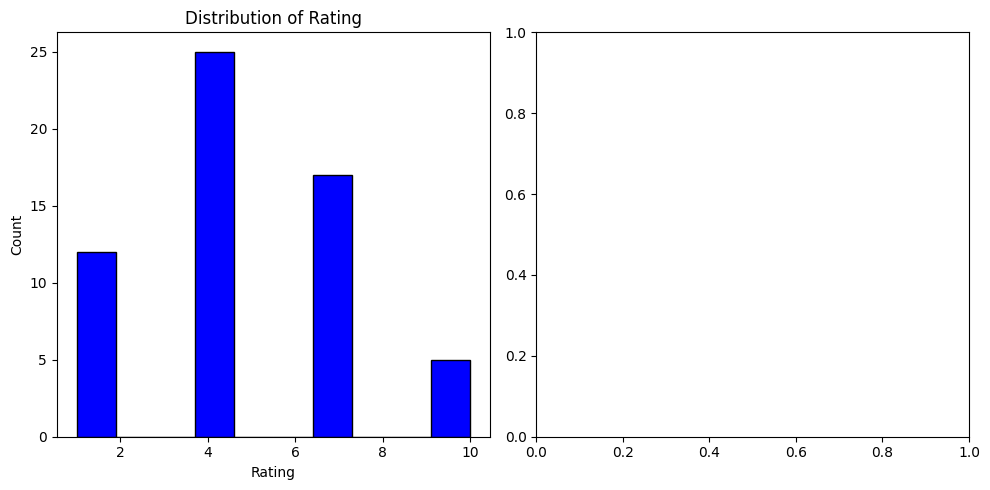

Ranking 1


Ranking 2
Ranking 3
Ranking 4


Ranking 5
Ranking 6
Ranking 7


Ranking 8
Ranking 9
Ranking 10


In [45]:
user = hord_score_df[hord_score_df["user_id"] == "aa8be8e7b6a0583749fe979741ca886e8c611f64ab6fd8a449f2aad62e9fdd02"]
display(user.head(20))
def plot(plot_df):
        # Set up the figure with two subplots
        #fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

        # Plot the first histogram on the first subplot
        ax1.hist(plot_df["rating"], bins=10, density=False, color='blue', edgecolor='black')
        ax1.set_xlabel('Rating')
        ax1.set_ylabel('Count')
        ax1.set_title('Distribution of Rating')

        # check if plot_df["artifacts"] contains only NaN values
        if not plot_df["artifacts"].isnull().values.all():
                # Plot the second histogram on the second subplot
                ax2.hist(plot_df["artifacts"], bins=5, density=False, color='blue', edgecolor='black')
                ax2.set_xlabel('Artifacts')
                ax2.set_ylabel('Count')
                ax2.set_title('Distribution of Artifacts')

        # Adjust the layout of the subplots
        fig.tight_layout()

        # Show the figure
        plt.show()

plot(user)

for i in range(1, 11):
        print(f"Ranking {i}")
        user_rating = user[user["rating"] == i]
        images = user_rating["id"].apply(lambda x: f"dataset/{x}.webp")
        if len(images) > 0:
                ipyplot.plot_images(images.unique(), img_width=250, max_images=100)